In [ ]:
#%pip install pandas scikit-learn matplotlib

In [3]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data = pd.read_csv("ozone.csv")

y = data["MaxO3"]

data=data[["T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","MaxO3v"]]

def normalization(data):
    columns = data.columns
    for col in columns:
        x = data[[col]].values.astype(float)
        standard_normalizer = preprocessing.StandardScaler()
        data[col]=standard_normalizer.fit_transform(x)
        
normalization(data)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.2)

In [6]:
polynomial_features = PolynomialFeatures(degree=2)

In [7]:
poly_regression_alg = LinearRegression()

In [12]:
model = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression",poly_regression_alg)
    ]
)

In [13]:
model.fit(x_train,y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [14]:
train_predictions = model.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),2)}")

print(f"R2_score = {round(r2_score(y_train,train_predictions),2)}")

RMSE = 6.05
R2_score = 0.95


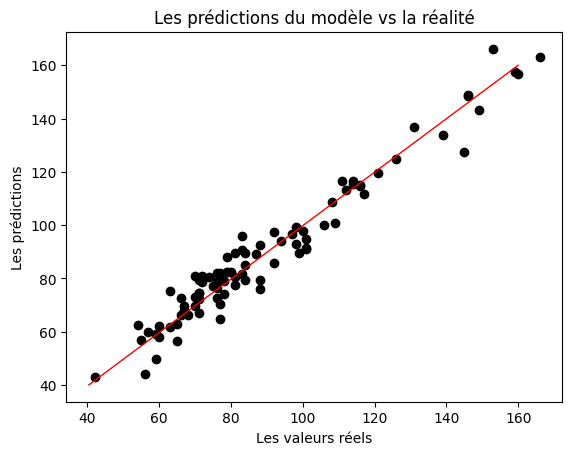

In [16]:
plt.scatter(y_train,train_predictions,color="black")
plt.title("Les prédictions du modèle vs la réalité")
plt.xlabel("Les valeurs réels")
plt.ylabel("Les prédictions")
plt.plot([40.40,160.0],[40.0,160.0],"red",lw=1)

In [17]:
test_predictions = model.predict(x_test)

print(f"RMSE = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score = {round(r2_score(y_test,test_predictions),2)}")

RMSE = 30.67
R2_score = -0.04


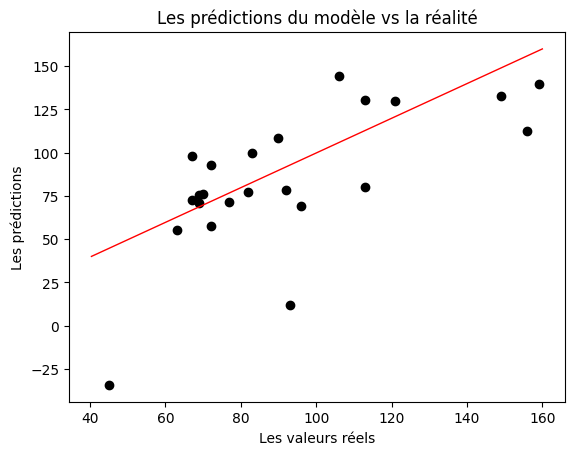

In [19]:
plt.scatter(y_test,test_predictions,color="black")
plt.title("Les prédictions du modèle vs la réalité")
plt.xlabel("Les valeurs réels")
plt.ylabel("Les prédictions")
plt.plot([40.40,160.0],[40.0,160.0],"red",lw=1)
plt.show()